In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

shape of x: (569, 30)
shape of y: (569,)


In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
    
    def __init__(self,x,y):    
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
 
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    def __len__(self):
        return self.length
trainset = dataset(x,y)

#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [22]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [23]:
#hyper parameters
learning_rate = 0.01
epochs = 1000
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [24]:
#forward loop
losses = []
accur = []
for i in range(epochs):
    for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
        output = model(x_train)

        #calculate loss
        loss = loss_fn(output,y_train.reshape(-1,1))

        #accuracy
        predicted = model(torch.tensor(x,dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if i%50 == 0:
        losses.append(loss)
        accur.append(acc)
        print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.7299606800079346	 accuracy : 0.37258347978910367
epoch 50	loss : 0.13847503066062927	 accuracy : 0.9595782073813708
epoch 100	loss : 0.09040165692567825	 accuracy : 0.9736379613356766
epoch 150	loss : 0.07833808660507202	 accuracy : 0.9789103690685413
epoch 200	loss : 0.06933427602052689	 accuracy : 0.984182776801406
epoch 250	loss : 0.06199798732995987	 accuracy : 0.9859402460456942
epoch 300	loss : 0.055742863565683365	 accuracy : 0.9876977152899824
epoch 350	loss : 0.05106556788086891	 accuracy : 0.9876977152899824
epoch 400	loss : 0.04704492166638374	 accuracy : 0.9912126537785588
epoch 450	loss : 0.04365112632513046	 accuracy : 0.9912126537785588
epoch 500	loss : 0.04060571268200874	 accuracy : 0.9912126537785588
epoch 550	loss : 0.03773082420229912	 accuracy : 0.9912126537785588
epoch 600	loss : 0.03517816960811615	 accuracy : 0.9929701230228472
epoch 650	loss : 0.03282772749662399	 accuracy : 0.9929701230228472
epoch 700	loss : 0.03068651258945465	 accuracy : 0.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

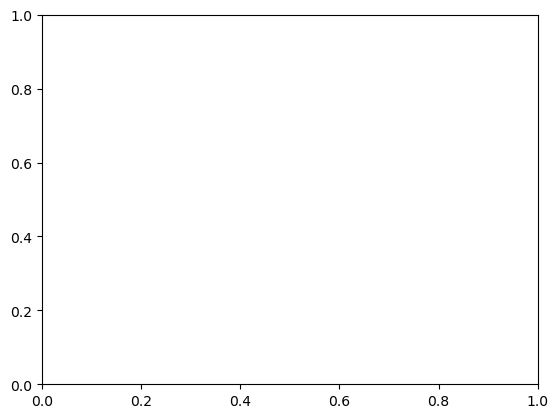

In [34]:
plt.plot(losses)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

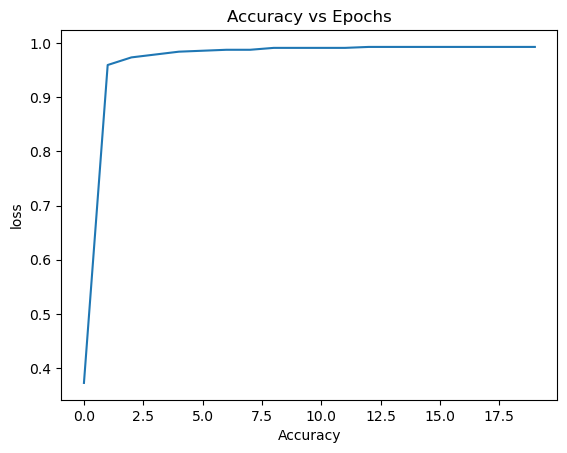

In [30]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')